In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# path = '2019-11-22_19-07-57_その1.txt'
path = '2019-11-22_19-15-11_その2.txt'

In [3]:
columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"]
sampling_rate = 1000

df = None
reader = pd.read_csv(path, sep='\t', header=None, names=columns, index_col=False, chunksize=600*sampling_rate)
for r in reader:
    if df is None:
        #  頭から3行目は要らない
        df = r.drop([i for i in range(3)])
    else:
        df = df.append(r, ignore_index=True)
        
df = df.reset_index(drop=True)

print(df.shape)
df.head()

(485250, 11)


/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nSeq,I1,I2,O1,O2,A1,A2,A3,A4,A5,A6
0,0,0.0,0.0,0.0,0.0,510.0,497.0,102.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,509.0,499.0,102.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,509.0,499.0,102.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,506.0,500.0,102.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,505.0,501.0,102.0,0.0,0.0,0.0


In [4]:
data = df['A2'].copy()
data = data[60*sampling_rate:70*sampling_rate].values

In [5]:
from scipy.signal import find_peaks

beatRate_peak = data - np.mean(data)
for i in range(data.size):
    if beatRate_peak[i] < 0:
        beatRate_peak[i] = 0

peaks, _ = find_peaks(data, distance=50)

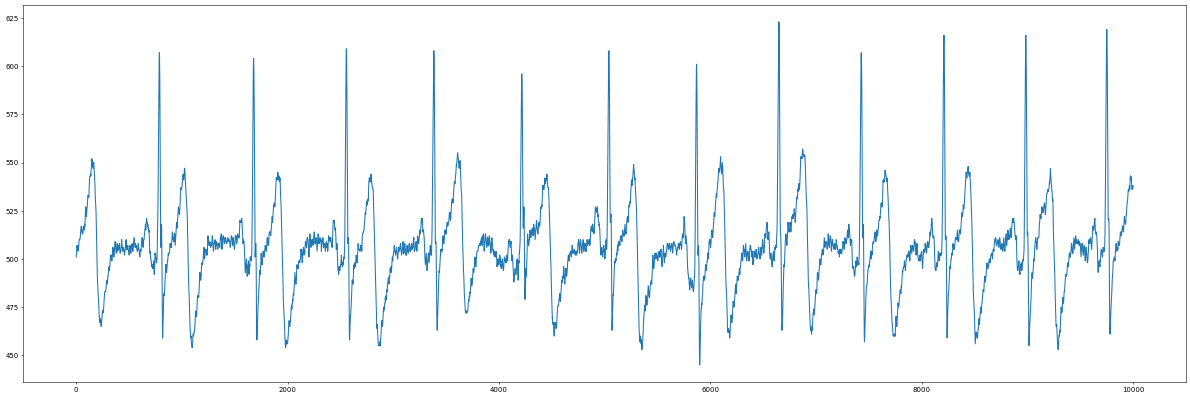

In [6]:
plt.figure(figsize=(30, 10), dpi=50)
plt.plot(data)

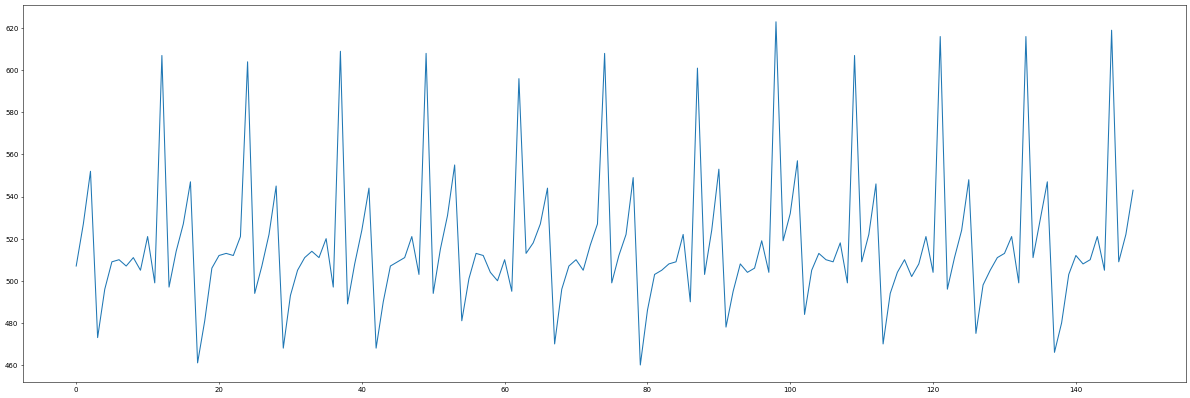

In [7]:
plt.figure(figsize=(30, 10), dpi=50)
plt.plot(data[peaks])

In [9]:
from scipy.interpolate import interp1d

tRR = np.delete(data[peaks], 0)
RR = np.diff(data[peaks], n=1)
# interpolation
t_s = np.linspace(tRR[0], tRR[-1])
RR_s = interp1d(tRR, RR)(t_s)

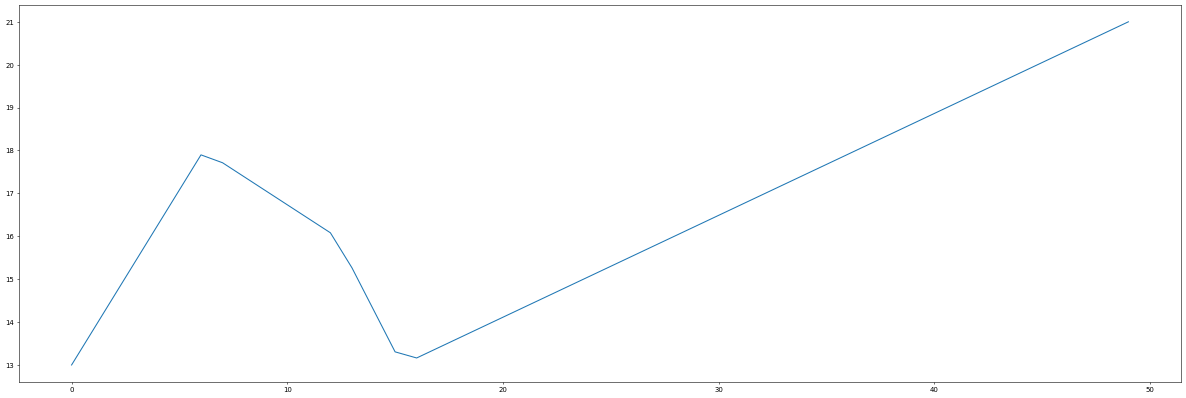

In [10]:
plt.figure(figsize=(30, 10), dpi=50)
plt.plot(RR_s)